# 🏡 House Price Prediction using Linear Regression

This notebook performs regression analysis to predict house prices using features like Size, Location, and Number of Rooms.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load dataset
df = pd.read_csv('house_prices.csv')
df.head()


,Size,Location,Number of Rooms,Price
0,1360,urban,4,316470
1,1794,suburban,4,381964
2,1630,suburban,6,327648
3,1595,rural,2,274236
4,2138,rural,3,367190


In [3]:
# Basic inspection
print("Shape:", df.shape)
print("Missing values:\n", df.isnull().sum())
print("Data types:\n", df.dtypes)


Shape: (200, 4)
Missing values:
 Size               0
Location           0
Number of Rooms    0
Price              0
dtype: int64
Data types:
 Size                int64
Location           object
Number of Rooms     int64
Price               int64
dtype: object


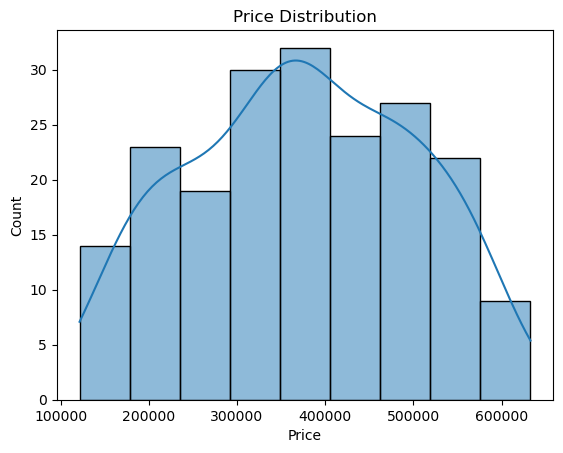

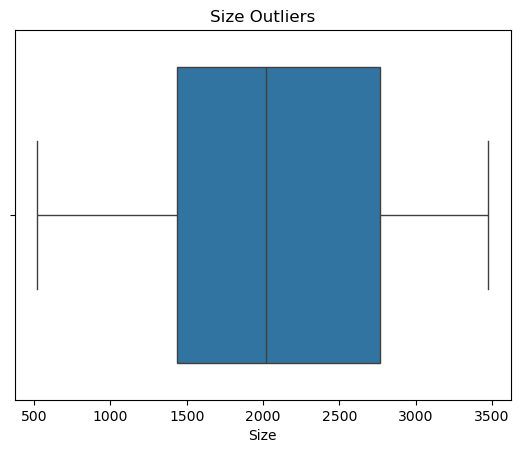

In [4]:
# Price distribution
sns.histplot(df['Price'], kde=True)
plt.title("Price Distribution")
plt.show()

# Size outlier check
sns.boxplot(x=df['Size'])
plt.title("Size Outliers")
plt.show()


In [13]:
# Feature-target split
X = df[['Size', 'Location', 'Number of Rooms']]
y = df['Price']

# Define preprocessing
numeric_features = ['Size', 'Number of Rooms']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = ['Location']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])


In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train model
model = make_pipeline(preprocessor, LinearRegression())
model.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Size', 'Number of Rooms']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Location'])])),
                ('linearregression', LinearRegression())])

In [11]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


RMSE: 20693.07
R² Score: 0.97


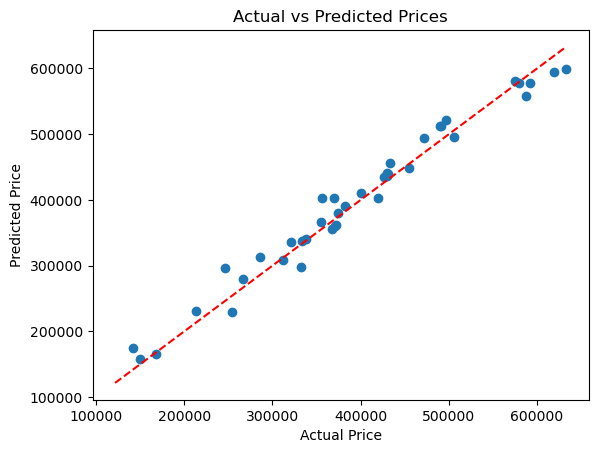

In [12]:
# Actual vs Predicted
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()


In [9]:
# Show feature importance
lin_reg = model.named_steps['linearregression']
feature_names = model.named_steps['columntransformer'].get_feature_names_out()
coefficients = pd.Series(lin_reg.coef_, index=feature_names)
coefficients.sort_values(ascending=False)


num__Size                 121117.663967
cat__Location_urban        36928.170991
num__Number of Rooms       19100.480031
cat__Location_suburban     15741.416629
dtype: float64